<a href="https://colab.research.google.com/github/aslla77/lab-study/blob/main/Logistic_EQUATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


#Logistic EQUATION

## $\dot x = rx(1- {x \over K} )$

## $\dot ϵ = {d \over dt}~(x-x^*) ~=r(x^*+ϵ)~(1- {{x^*+ϵ}\over K}) $

## $~~\simeq rϵ -2rx^*{ϵ \over K} =rϵ(1-2x*/K) $

#Linerarize 

## $\dot ϵ = {d \over dt}~(x-x^*) = f(x^*+ϵ)$

## $~~ \approx f^\prime(x^*)ϵ $

In [169]:
def fx(x,r,K):
  f=r*x*(1-x/K)
  return f

In [170]:
#X값 확인용

def x_Euler(t,x0,r,K,dt):
  x_list=np.zeros(len(t))
  x_list[0]=x0
  for i in range(1,len(x_list)):
    x_list[i]=x_list[i-1]+fx(x_list[i-1],r,K)*dt
  return x_list

def x_mod_Euler(t,x0,r,K,dt):
  x_list=x_Euler(t,x0,r,K,dt)
  for i in range(1,len(x_list)):
    x_list[i]=x_list[i-1]+(fx(x_list[i-1],r,K)+fx(x_list[i],r,K))/2*dt
  return x_list

def x_midpoint(t,x0,r,K,dt):
  x_list=np.zeros(len(t))
  x_list[0]=x0
  for i in range(1,len(x_list)):
    temp=x_list[i-1]+fx(x_list[i-1],r,K)*dt/2
    x_list[i]=x_list[i-1]+fx(temp,r,K)*dt
  return x_list

def runge_kutta(t,x0,r,K,dt):
  x_list=np.zeros(len(t))
  x_list[0]=x0
  for i in range(1,len(x_list)):
    k1=fx(x_list[i-1],r,K)*dt
    k2=fx(x_list[i-1]+k1/2,r,K)*dt
    k3=fx(x_list[i-1]+k2/2,r,K)*dt
    k4=fx(x_list[i-1]+k3,r,K)*dt
    x_list[i]=x_list[i-1]+1/6*(k1+2*k2+2*k3+k4)
  return x_list

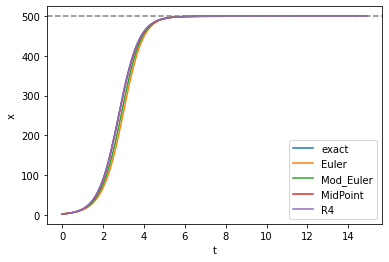

In [201]:
t0=0
t=15
dt=0.1
x0=2
r=2
K=500

t=np.arange(t0,t,dt)

exact_x=K/(1+(K-x0)/x0*np.exp(-r*t))

Euler_x=x_Euler(t,x0,r,K,dt)
mod_x=x_mod_Euler(t,x0,r,K,dt)
mid_x=x_midpoint(t,x0,r,K,dt)
r4_x=runge_kutta(t,x0,r,K,dt)


plt.plot(t,exact_x,label='exact')
plt.plot(t,Euler_x,label='Euler')
plt.plot(t,mod_x,label='Mod_Euler')
plt.plot(t,mid_x,label='MidPoint')
plt.plot(t,r4_x,label='R4')
plt.xlabel('t')
plt.ylabel('x')
plt.axhline(500,color='gray',linestyle='--')
plt.legend()
plt.show()

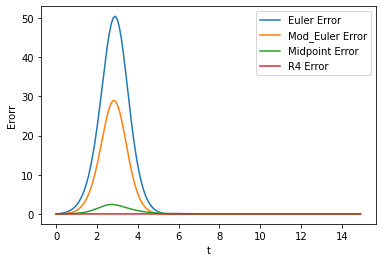

In [172]:
w_Euler_x=abs(Euler_x-exact_x)
w_mod_x=abs(mod_x-exact_x)
w_mid_x=abs(mid_x-exact_x)
w_r4_x=abs(r4_x-exact_x)

plt.plot(t,w_Euler_x,label='Euler Error')
plt.plot(t,w_mod_x,label='Mod_Euler Error')
plt.plot(t,w_mid_x,label='Midpoint Error')
plt.plot(t,w_r4_x,label='R4 Error')
plt.xlabel('t')
plt.ylabel('Erorr')

plt.legend()
plt.show()

In [185]:
def df(x):
  df=r-2*x/K
  return df

def Euler(x,dx):
  f=np.zeros(len(x))
  for i in range(1,len(f)):
    f[i]=f[i-1]+df(f[i-1])*dx
  return f


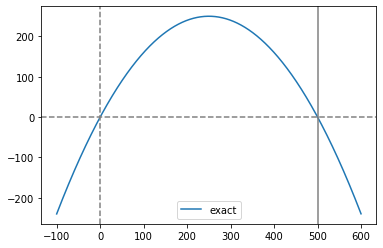

In [199]:

x_list=np.arange(-100,600,0.1)

exact_f=fx(x_list,r,K)

plt.plot(x_list,exact_f,label='exact')
plt.axvline(0,color='gray',linestyle='--')
plt.axvline(500,color='gray',linestyle='-')
plt.axhline(0,color='gray',linestyle='--')
plt.legend()
plt.show()